In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv(r"C:\Users\oyedeepak\Downloads\Assignment\Basic\set1.csv")
df.head(15)

,Name of company,Measure X
0,Allied Signal,24.23%
1,Bankers Trust,25.53%
2,General Mills,25.41%
3,ITT Industries,24.14%
4,J.P.Morgan & Co.,29.62%
5,Lehman Brothers,28.25%
6,Marriott,25.81%
7,MCI,24.39%
8,Merrill Lynch,40.26%
9,Microsoft,32.95%


In [16]:
df['Measure X'] = df['Measure X'].str.rstrip('%').astype('float') / 100.0
df.dtypes

Name of company     object
Measure X          float64
dtype: object

In [17]:
df.head(15)

,Name of company,Measure X
0,Allied Signal,0.2423
1,Bankers Trust,0.2553
2,General Mills,0.2541
3,ITT Industries,0.2414
4,J.P.Morgan & Co.,0.2962
5,Lehman Brothers,0.2825
6,Marriott,0.2581
7,MCI,0.2439
8,Merrill Lynch,0.4026
9,Microsoft,0.3295


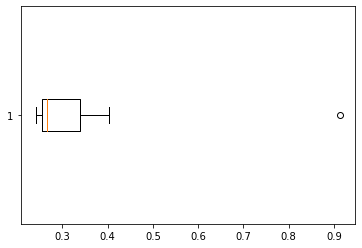

In [18]:
#plotting boxplot
plt.boxplot(df['Measure X'], vert= False)
plt.show()


 
#Most of the values are between 40 and 24 with Morgan Stanley being the exception(= 91.36%)
#Morgan Stanley is the outlier

In [20]:
#Removing outlier in new dataset
from scipy.stats import zscore
z_scores =zscore(df['Measure X'])
zscoreabs = np.abs(z_scores)
zscoreabs

array([0.55228372, 0.4728741 , 0.48020422, 0.55778131, 0.22303922,
       0.30672475, 0.45577049, 0.54251023, 0.42689797, 0.01962843,
       3.54830686, 0.44477532, 0.37558714, 0.4007946 , 0.10559443])

In [21]:
filtered = (zscoreabs < 3)
dfn = df[filtered]
dfn

,Name of company,Measure X
0,Allied Signal,0.2423
1,Bankers Trust,0.2553
2,General Mills,0.2541
3,ITT Industries,0.2414
4,J.P.Morgan & Co.,0.2962
5,Lehman Brothers,0.2825
6,Marriott,0.2581
7,MCI,0.2439
8,Merrill Lynch,0.4026
9,Microsoft,0.3295


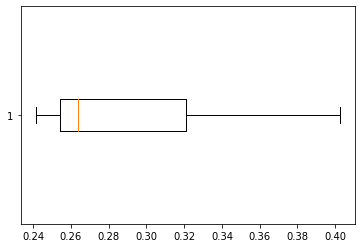

In [22]:
#plotting boxplot without outlier
plt.boxplot(dfn['Measure X'], vert= False)
plt.show()

In [23]:
m1 = df['Measure X'].mean()
m2 = dfn['Measure X'].mean()
print('Mean with outlier:', m1)
print('Mean without outlier:', m2)

Mean with outlier: 0.3327133333333333
Mean without outlier: 0.29122142857142863


In [24]:
sd1 = df['Measure X'].std()
sd2 = dfn['Measure X'].std()
print('Standard deviation with outlier:', sd1)
print('Standard deviation without outlier:', sd2)

Standard deviation with outlier: 0.16945400921222029
Standard deviation without outlier: 0.055797603733651335


In [25]:
v1 = df['Measure X'].var()
v2 = dfn['Measure X'].var()
print('Variation with outlier:', v1)
print('Variation without outlier:', v2)

Variation with outlier: 0.028714661238095233
Variation without outlier: 0.0031133725824175817


In [26]:
#Q2
#i) Range of IQR = (5, 12.5). It says that 50% of values lie in the range.
#ii) It slightly positive skewed.
#iii) It will show a boxplot without outlier, and will be more explainable.

In [27]:
#Q3
#i) The highest peak of the histogram represents the location of the mode. It is between 4 and 8.
#ii) It is right skewed histogram with a outlier.
#iii) Box plot provide more of a summary of a distribution.  it typically provides the median, 25th and 75th percentile, min/max 
#that is not an outlier and explicitly separates the points that are considered outliers. 
#Histogram allows to visually and quickly assess the shape of the distribution, the central tendency,
#the amount of variation in the data, and the presence of gaps, outliers or unusual data points.

In [28]:
#Q4
#Ans) Probability of atleast one call reaching the wrong number is 0.025

#P(E) =  Probabilty of call being misdirected
#P(Ebar) =  Probabilty of call not being misdirected

#P(Ebar) (1-P(E)) =  (1-(1/200)) = (199/200)

# Probability that at least one in 5 attempted call reaches the wrong number
# = 1 - Probability that no attempted call reaches the wrong number

#  = 1-((199/200)^5)
# = 0.025

In [34]:
#Q5
#i) most likely monetary outcome of the business venture: $2000, with the probability of 0.3

#ii) Yes, because while the business is having a loss of $300, it is having a profit of $1100.
#So, the overall profit is of $800. So, the venture will be successful in the long term 
#since the probability of non-negative return is higher than 0.50.

#iii)The long-term average earning of business venture of this kind:
#-2000*0.1-1000*0.1+0*0.2+1000*0.2+2000*0.3+3000*0.1 = $800

#iv) good measure of the risk involved in a venture of this kind is standard deviation.
# Mean = 500
#Std Deviation = sqrt((1/N)*(0.1*(-2000-500)^2)+ 0.1*(-1000-500)^2) + 0.2*(0-500)^2) + 0.2*(1000-500)^2) + 0.3*(2000-500)^2) + 0.1*(3000-500)^2))
# Std Deviation = 612